In [66]:
##### import library and data
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from statsmodels.formula.api import ols
from statsmodels.formula.api import wls
from sklearn.linear_model import LinearRegression


In [67]:
df = pd.read_csv('datanew.csv')

In [68]:
#Clean data
df.columns=df.columns.str.lower().str.replace(' ','_')
df.dropna()

,country,city,year,city_product_per_capita,internet_access,traffic_fatalities,pm10_concentration,voter_turnout,gini
0,Ghana,Accra,2015.0,"3,430.65",17.30,22.2,49.00,80.10,0.43
1,Kenya,Nairobi,2015.0,"8,208.96",50.33,20.9,5.85,85.91,0.34
2,Liberia,Monrovia,2015.0,707.52,4.60,19.0,8.78,38.60,0.38
3,Nigeria,Lagos,2015.0,"3,441.94",38.00,33.7,27.07,53.68,0.64
4,South Africa,Cape Town,2015.0,"15,770.36",49.30,31.9,16.00,73.48,0.67
...,...,...,...,...,...,...,...,...,...
334,Switzerland,Zurich,2015.0,"59,338.52",83.00,3.3,14.00,20.50,0.32
335,United Kingdom,London,2015.0,"37,929.24",89.70,2.8,13.70,65.80,0.41
336,United Kingdom,Manchester,2015.0,"36,030.00",83.00,2.8,14.00,65.80,0.30
339,Australia,Melbourne,2015.0,"44,646.55",74.50,5.1,5.00,93.23,0.33


In [69]:
df1=df.drop(columns = ['gini','country','year','city_product_per_capita'])
df1=df1.set_index('city')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, Accra to Sydney
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   internet_access     333 non-null    float64
 1   traffic_fatalities  292 non-null    float64
 2   pm10_concentration  327 non-null    float64
 3   voter_turnout       307 non-null    float64
dtypes: float64(4)
memory usage: 13.3+ KB


In [70]:
# normalisation
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)
df2=df2.rename(columns={0: 'internet_access', 1: 'traffic facilities',2:'PM10',3:'voter_turnout'})
df2=df2.dropna()
df2

,internet_access,traffic facilities,PM10,voter_turnout
0,0.168266,0.265728,0.116857,0.756880
1,0.512831,0.250090,0.002828,0.828256
2,0.035781,0.227234,0.010571,0.247052
3,0.384206,0.404066,0.058904,0.432310
4,0.502086,0.382413,0.029650,0.675553
...,...,...,...,...
334,0.853641,0.038374,0.024365,0.024693
335,0.923534,0.032359,0.023572,0.581204
336,0.853641,0.032359,0.024365,0.581204
339,0.764970,0.060026,0.000581,0.918182


In [71]:
#PCA calculating
pca = PCA()
pca.fit(df2)
pca.explained_variance_ratio_

array([0.42720231, 0.33167417, 0.16685638, 0.07426713])

In [72]:
#calculate smartness score
df2['smartness']=df2['internet_access']*0.42720231 + df2['traffic facilities']*0.33167417+df2['PM10']*0.16685638+df2['voter_turnout']*0.07426713

In [73]:
df['smartness']= df2['smartness']
df

,country,city,year,city_product_per_capita,internet_access,traffic_fatalities,pm10_concentration,voter_turnout,gini,smartness
0,Ghana,Accra,2015.0,"3,430.65",17.30,22.2,49.00,80.10,0.43,0.235729
1,Kenya,Nairobi,2015.0,"8,208.96",50.33,20.9,5.85,85.91,0.34,0.364015
2,Liberia,Monrovia,2015.0,707.52,4.60,19.0,8.78,38.60,0.38,0.110765
3,Nigeria,Lagos,2015.0,"3,441.94",38.00,33.7,27.07,53.68,0.64,0.340087
4,South Africa,Cape Town,2015.0,"15,770.36",49.30,31.9,16.00,73.48,0.67,0.396448
...,...,...,...,...,...,...,...,...,...,...
336,United Kingdom,Manchester,2015.0,"36,030.00",83.00,2.8,14.00,65.80,0.30,0.422640
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,Australia,Melbourne,2015.0,"44,646.55",74.50,5.1,5.00,93.23,0.33,0.414994


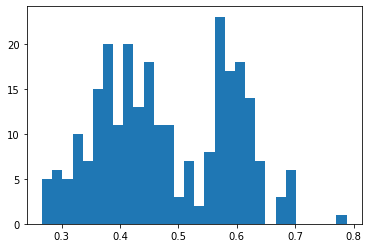

In [74]:
df=df.dropna()
# Final model for regression model
df_reg=df[['gini','smartness']]
df_reg
import matplotlib.pyplot as plt
s=np.sin(np.sqrt(df_reg['smartness']))
count, bins, ignored = plt.hist(s, 30)
plt.show()

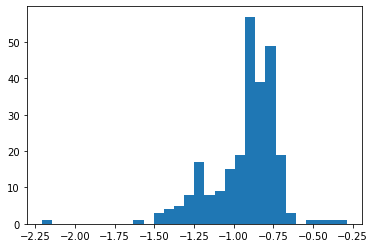

NormaltestResult(statistic=89.15350242900675, pvalue=4.370820047432988e-20)

In [75]:
import matplotlib.pyplot as plt
import scipy
from scipy.stats import kstest
from scipy.stats import anderson
from scipy.stats import normaltest
j=np.log(df_reg['gini'])
count, bins, ignored = plt.hist(j, 30)
plt.show()

scipy.stats.anderson(j, dist='norm')
normaltest(j, axis=None)

In [76]:
df_compare= pd.read_csv('developed_Data.csv')
df_compare

,country,hdi2019,pop2021
0,Norway,0.957,5465.630
1,Ireland,0.955,4982.907
2,Switzerland,0.955,8715.494
3,Iceland,0.949,343.353
4,Hong Kong,0.949,7552.810
...,...,...,...
181,South Sudan,0.433,11381.378
182,Burundi,0.433,12255.433
183,Chad,0.398,16914.985
184,Central African Republic,0.397,4919.981


In [77]:
#data for developed cities
df_developed=df_compare[df_compare['hdi2019']>0.8]
df_developed1 = pd.merge(df, df_developed, on='country',how='inner')
df_developed1.dropna()

,country,city,year,city_product_per_capita,internet_access,traffic_fatalities,pm10_concentration,voter_turnout,gini,smartness,hdi2019,pop2021
0,Argentina,Buenos Aires,2015.0,"32,185.00",59.90,12.60,16.00,79.39,0.40,0.372075,0.845,45605.826
1,Panama,Panama City,2014.0,"7,974.23",33.59,7.20,44.60,76.76,0.47,0.243491,0.815,4381.579
2,Canada,Montreal,2015.0,"42,028.96",76.20,6.10,11.00,61.11,0.29,0.399900,0.929,38067.903
3,Canada,Toronto,2015.0,"43,575.64",83.30,6.10,8.00,61.11,0.31,0.430218,0.929,38067.903
4,United States,Chicago,2015.0,"52,715.64",67.00,10.60,13.00,61.00,0.40,0.377636,0.926,332915.073
5,United States,New York,2015.0,"51,603.63",68.00,10.60,14.00,58.00,0.40,0.379796,0.926,332915.073
6,Japan,Osaka,2015.0,"113,504.51",78.50,4.10,9.00,59.00,0.34,0.399363,0.919,126050.804
7,Japan,Tokyo,2015.0,"35,711.93",86.00,4.10,21.81,52.66,0.34,0.432651,0.919,126050.804
8,Singapore,Singapore,2015.0,"78,763.38",73.00,2.94,20.00,94.65,0.46,0.407601,0.938,5896.686
9,Austria,Vienna,2015.0,"42,873.16",79.70,5.40,19.00,75.00,0.31,0.428905,0.922,9043.070


<AxesSubplot:title={'center':'smartness'}, xlabel='condition'>

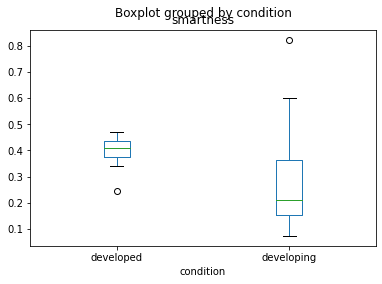

In [78]:
df_developed1['condition']="developed"
df_developing1['condition']="developing"
df_comp=df_developed1.append(df_developing1)
df_comp.dropna()
df_comp.boxplot(by='condition',column=['smartness'],grid = False)

In [79]:
#data for developing cities
df_developing=df_compare[df_compare['hdi2019']<0.8]
df_developing1 = pd.merge(df, df_developing, on='country',how='inner')
df_developing1.dropna()

,country,city,year,city_product_per_capita,internet_access,traffic_fatalities,pm10_concentration,voter_turnout,gini,smartness,hdi2019,pop2021
0,Ghana,Accra,2015.0,"3,430.65",17.30,22.20,49.00,80.10,0.43,0.235729,0.611,31732.129
1,Kenya,Nairobi,2015.0,"8,208.96",50.33,20.90,5.85,85.91,0.34,0.364015,0.601,54985.698
2,Liberia,Monrovia,2015.0,707.52,4.60,19.00,8.78,38.60,0.38,0.110765,0.480,5180.203
3,Nigeria,Lagos,2015.0,"3,441.94",38.00,33.70,27.07,53.68,0.64,0.340087,0.539,211400.708
4,South Africa,Cape Town,2015.0,"15,770.36",49.30,31.90,16.00,73.48,0.67,0.396448,0.709,60041.994
...,...,...,...,...,...,...,...,...,...,...,...,...
224,Peru,Lima,2014.0,"11,945.44",48.20,27.20,50.00,81.01,0.33,0.394656,0.777,33359.418
225,China,Hong Kong,2015.0,"38,123.52",45.80,1.38,21.00,18.49,0.49,0.211114,0.761,1444216.107
226,Mongolia,Ulaanbaatar,2015.0,"13,991.29",24.50,17.78,68.00,66.79,0.37,0.246415,0.737,3329.289
227,Indonesia,Jakarta,2015.0,"32,428.15",63.44,12.09,21.00,69.58,0.43,0.379071,0.718,276361.783


In [80]:
#Research Question1: Mann Whitney U Test 
import scipy.stats as stats

#perform the Mann-Whitney U test
Results=stats.mannwhitneyu(df_developing1['smartness'], df_developed1['smartness'], alternative='two-sided')
Results

MannwhitneyuResult(statistic=1138.0, pvalue=8.474438950138628e-10)

In [81]:
#Overall OSL model of regression
model = ols('gini ~ smartness', data=df_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     34.47
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.32e-08
Time:                        01:53:18   Log-Likelihood:                 313.41
No. Observations:                 261   AIC:                            -622.8
Df Residuals:                     259   BIC:                            -615.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4567      0.010     44.942      0.0

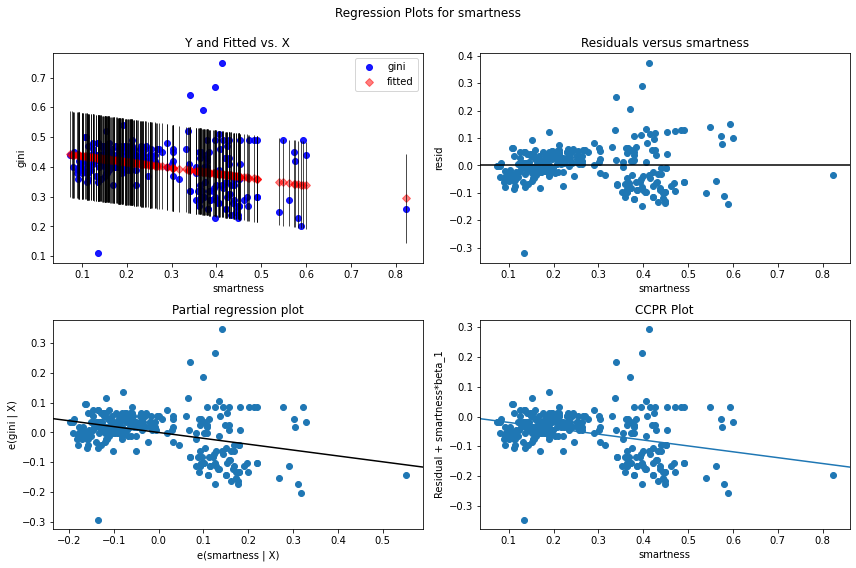

In [82]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'smartness', fig=fig)

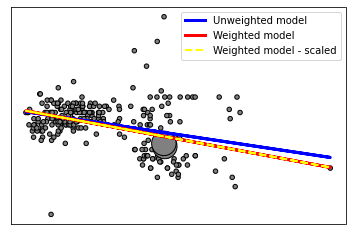

In [83]:
#draw the graph between two models
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
X=df_reg[['smartness']]
y=df_reg[['gini']]

n_samples = 261


# Create equal weights and then augment the last 2 ones
sample_weight = np.ones(n_samples) * 20
sample_weight[-2:] *= 30

plt.scatter(X, y, s=sample_weight, c='grey', edgecolor='black')

# The unweighted model
regr = LinearRegression()
regr.fit(X, y)
plt.plot(X, regr.predict(X), color='blue', linewidth=3, label='Unweighted model')

# The weighted model
regr = LinearRegression()
regr.fit(X, y, sample_weight)
plt.plot(X, regr.predict(X), color='red', linewidth=3, label='Weighted model')

# The weighted model - scaled weights
regr = LinearRegression()
sample_weight = sample_weight / sample_weight.max()
regr.fit(X, y, sample_weight)
plt.plot(X, regr.predict(X), color='yellow', linewidth=2, label='Weighted model - scaled', linestyle='dashed')
plt.xticks(());plt.yticks(());plt.legend();

In [84]:
#Overall WSL regression model
nsample=261
w = np.ones(nsample)
w1=1.0 / (w ** 2)
model3 = wls('gini ~ smartness', data=df_reg, weights=sample_weight).fit()
print(model3.summary())

                            WLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.191
Model:                            WLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.33e-13
Time:                        01:53:20   Log-Likelihood:                 310.85
No. Observations:                 261   AIC:                            -617.7
Df Residuals:                     259   BIC:                            -610.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4635      0.010     45.468      0.0

In [85]:
#Regression model for developed country
model_developed = ols('gini ~ smartness', data=df_developed1).fit()
print(model_developed.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     11.50
Date:                Tue, 18 Jan 2022   Prob (F-statistic):            0.00202
Time:                        01:53:20   Log-Likelihood:                 51.320
No. Observations:                  31   AIC:                            -98.64
Df Residuals:                      29   BIC:                            -95.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5953      0.078      7.658      0.0

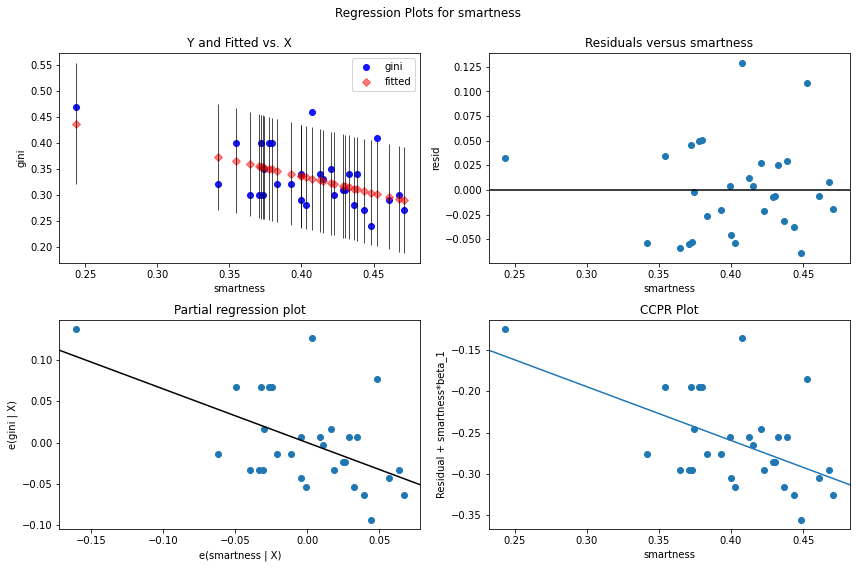

In [86]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_developed, 'smartness', fig=fig)

In [87]:
#Regression model for developing cities
model_developing = ols('gini ~ smartness', data=df_developing1).fit()
print(model_developing.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     14.04
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           0.000227
Time:                        01:53:21   Log-Likelihood:                 275.10
No. Observations:                 229   AIC:                            -546.2
Df Residuals:                     227   BIC:                            -539.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4476      0.010     43.137      0.0

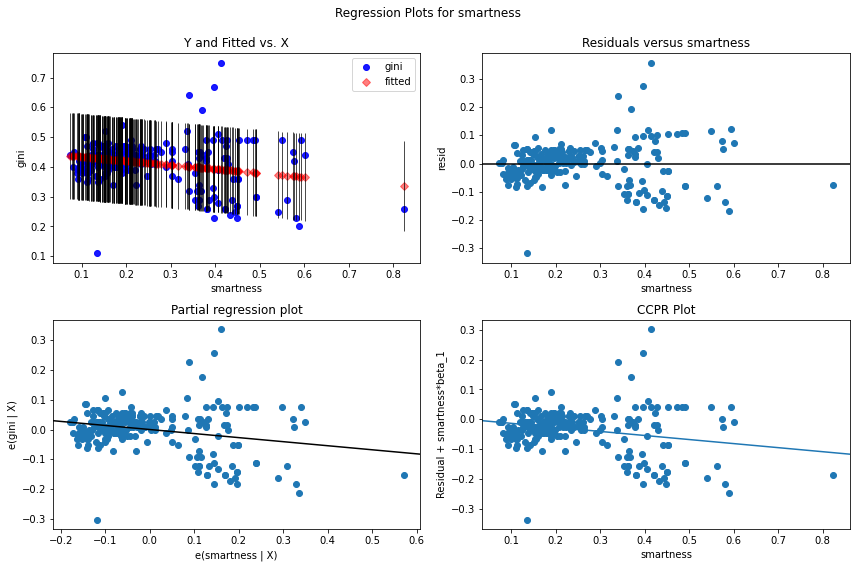

In [88]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_developing, 'smartness', fig=fig)